# us-accidents-analysis

Use the "Run" button to execute the code.

#US Accidents Exploratory Data Analysis

TODO - talk about EDA

TODO - talk about the dataset (source, what it contains, how it will be useful)

    Kaggle
    informaiton about accidents
    can use useful to prevent accidents
    mention that this does not contain data about New York


In [2]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

 81%|████████  | 218M/269M [00:42<00:10, 5.13MB/s] 

In [ ]:
data_filename = './us-accidents/US_Accidents_Dec21_updated.csv'

#Data Prepration and Cleaning 

1.   Load the file using Pandas

2.  Look at some information about the data & the columns
3.    Fix any missing or incorrect values


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df.columns

In [11]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerics_df = df.select_dtypes(include=numerics)
len(numerics_df.columns)

In [14]:
missing_percentage = df.isna().sum().sort_values(ascending= False) / len(df)
missing_percentage

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

In [ ]:
type(missing_percentage)

In [ ]:
missing_percentage[missing_percentage!= 0].plot(kind='barh')


#Exploratory Analysis and Visualization
Columns we'll analyze:

1.   City
2.Start Time
3.Start Lat and Start Lng
4.Temperature
5.Weather Condition

In [24]:
df.columns


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [25]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [27]:
cities = df.City.unique()
len(cities)

11682

In [28]:
cities_by_accident = df.City.value_counts()
cities_by_accident


Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [29]:
cities_by_accident[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

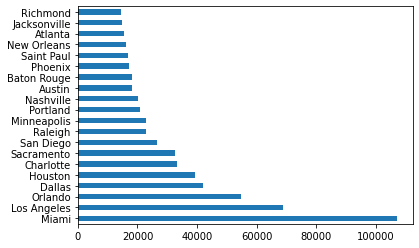

In [30]:
cities_by_accident[:20].plot(kind="barh")

In [32]:
import seaborn as sns
sns.set_style("darkgrid")

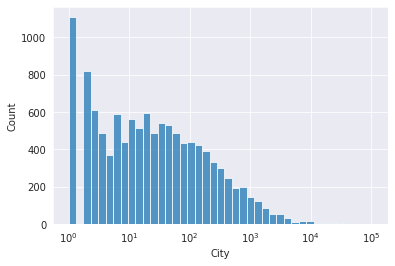

In [33]:
sns.histplot(cities_by_accident, log_scale=True)

In [34]:
cities_by_accident[cities_by_accident == 1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

## Start Time


In [36]:
df.Start_Time


0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [37]:
df.Start_Time = pd.to_datetime(df.Start_Time)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


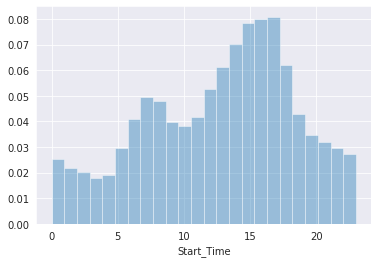

In [38]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)


*   A high percentage of accidents occure between 3 pm to 6 pm 


*   Next higest percentage is 7am to 9 am





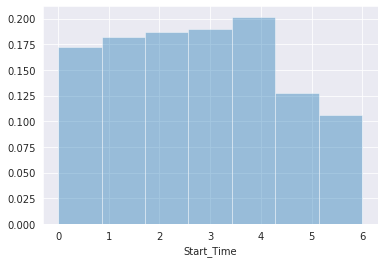

In [42]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7 ,kde=False ,norm_hist=True)

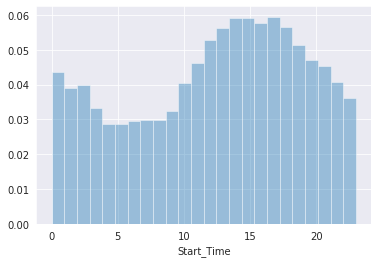

In [43]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

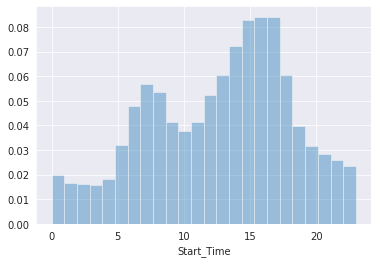

In [45]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

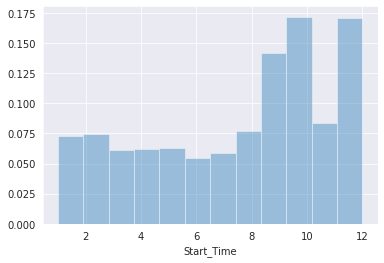

In [61]:
df_2019 = df[df.Start_Time.dt.year == 2019]
#df_2019_Bing = df_2019[df_2019.Source == 'MapQuest']
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

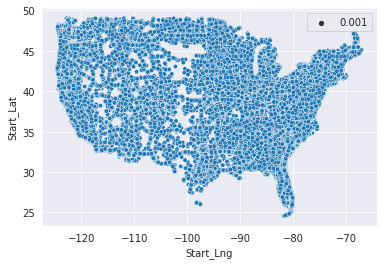

In [66]:
sample_df = df.sample(int(0.1*len(df)))
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat, size = 0.001)

In [1]:
import folium

In [8]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [9]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
  print(x[1])

188571     32.893850
1461039    35.419310
2601680    42.469800
1330404    38.881784
2438078    34.104032
             ...    
2777354    45.752906
2376860    34.393350
1748756    40.778295
2446278    41.225260
2274086    40.745370
Name: Start_Lat, Length: 100, dtype: float64
188571     -79.983040
1461039    -84.696038
2601680    -83.756220
1330404    -77.060197
2438078   -118.319706
              ...    
2777354   -118.050305
2376860   -118.574512
1748756    -74.048025
2446278    -95.951990
2274086    -73.731220
Name: Start_Lng, Length: 100, dtype: float64


In [10]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [12]:
from folium.plugins import HeatMap


In [13]:
sample_df = df.sample(int(0.001 * len(df)))
lat_and_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [15]:
map = folium.Map()
HeatMap(lat_and_lon_pairs).add_to(map)
map

## Ask & Answer Questions




  1.  Are there more accidents in warmer or colder areas?
  2.  Which 5 states have the highest number of accidents? How about per capita?
  3.  Does New York show up in the data? If yes, why is the count lower if this the most populated city.
  4.  Among the top 100 cities in number of accidents, which states do they belong to most frequently.
  5.  What time of the day are accidents most frequent in? - ANSWERED
  6.  Which days of the week have the most accidents?
  7.  Which months have the most accidents?
  8.  What is the trend of accidents year over year (decreasing/increasing?)
  9.  When is accidents per unit of traffic the highest.


## Summary and Conclusion


Insights:
- No data from New York
- The number of accidents per city decreases exponentially
- Less than 5% of cities have more than 1000 yearly accidents.
- Over 1100 cities have reported just one accident (need to investigate)
